In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('Suicide_Detection.csv' )

In [3]:
df_baru = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df_baru.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [5]:
df['class'].value_counts()

non-suicide    116037
suicide        116037
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelBinarizer

X = df['text'].values
y = df['class'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

array(['non-suicide', 'suicide'], dtype='<U11')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

for pred, text in zip(y_pred[:5], X_test[:5]):
    print(f'pred : {pred} - teks : {text}\n')

pred : 1 - teks : Saying stuff I’ve never said before I dieDon’t read this if you’re here to help me. I don’t want help. I don’t want advice or kind words. I just want to be able to vent and say stuff I never got the chance to before I die. So please just help someone else. Thank you.

How the fuck am I still alive? I didn’t think I’d make it past 12. Somehow, against every single odd, I’m finally an adult. I barely made it through my last year of high school. How am I still here?

I’ve been taking antidepressants on and off for a year now. I just get too depressed to take them, like why do I deserve them? What did I ever do to be able to deserve happiness? I didn’t do anything good, so why should I be rewarded with it. I finally was able to take them for a few solid weeks in a row now, and then they suddenly just stopped. I’m fucking depressed as hell now and I relapsed and cut myself for the first time in months. I can’t even do it with a knife, I just use my house key or my nails. T

In [11]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[27392,  1634],
       [ 2125, 26868]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9352108791947465

In [13]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.9426706897761561

In [14]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.9267064463836099

In [15]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.9346204017740674

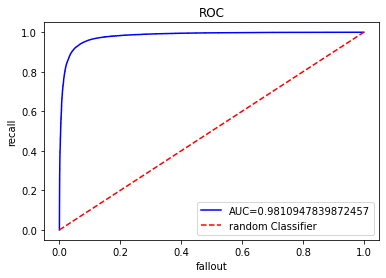

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob_estimates = model.predict_proba(X_test_tfidf)

fpr, tpr, threshold = roc_curve(y_test, prob_estimates[:,1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr,'b', label = f'AUC={nilai_auc}')
plt.plot([0,1],[0,1],'r--', label = 'random Classifier')

plt.title('ROC')
plt.xlabel('fallout')
plt.ylabel('recall')
plt.legend()
plt.show()

In [17]:
import pickle

In [18]:
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

In [19]:
import pickle

with open('model_web', 'wb') as files:
    pickle.dump(vectorizer, files)
    
with open('model_web2', 'wb') as files:
    pickle.dump(model, files)

In [19]:
def predict(postingan):
    from googletrans import Translator
    translator = Translator()
    dt1 = translator.translate(postingan)
    kata = dt1.text

    with open('model_web', 'rb') as f:
        lr1 = pickle.load(f)

    with open('model_web1', 'rb') as f:
        lr = pickle.load(f)

    posting = [kata]
    posting1 = np.array(posting)
    test = lr1.transform(posting1)

    hasil = lr.predict_proba(test)
    persen = (hasil[0][1])*100
    return f'{round(persen,2)}%'
    

In [20]:
predict('saya mau mati')

ModuleNotFoundError: No module named 'googletrans'

In [50]:
postingan = ['Oke gua move on nih', 'Sejujurnya gua gapede sama pkm ini, kelompok gua kompak, tpi gua jdi ketua, tapi ga pede'
            ,'Diakui bukan mengakui','Cocok buat gua bilang :  "kamu terlalu baik buat aku\" Wkwkwkw ini gara2 mamank','Bangun tidur, notif ipbm ']

In [67]:
kemungkinan = []

In [68]:
for i in postingan:
    ini = predict(i)
    kemungkinan.append(ini)

In [69]:
kemungkinan

['9.84%', '7.71%', '11.95%', '9.43%', '21.53%']

In [75]:
def tampilan(postingan, kemungkinan):
    df = pd.DataFrame({'Postingan': postingan,
                      'Level Depresi': kemungkinan},
                      index = np.arange(1, len(postingan) + 1))
    return df

In [78]:
print('Level Stress Faiz Lewat 5 Postingan Terakhir')
display(tampilan(postingan, kemungkinan))

Level Stress Faiz Lewat 5 Postingan Terakhir


,Postingan,Level Depresi
1,Oke gua move on nih,9.84%
2,"Sejujurnya gua gapede sama pkm ini, kelompok g...",7.71%
3,Diakui bukan mengakui,11.95%
4,"Cocok buat gua bilang : ""kamu terlalu baik bu...",9.43%
5,"Bangun tidur, notif ipbm",21.53%


In [79]:
emte = ['agak gak terima kenyataan kalo w udh ketinggal 3 vol hai miiko, bahkan 2022 nanti udah ada vol 34. selama ini duit w kemana aja ya? Wajah menangis kencangTangan melipat Ternyata bener udah selama itu w gak beli dan baca komik (buku) lagi',
        'INI JUGA 2 OKNUM INI KENAPA GEMES BGT SIH KEK DR CERITA F4 SEBELUM2NYA JUGA XI MEN XIAO YOU TUH QJEIEIRORPDJSAHSGJ INI JUGA 2 OKNUM INI KENAPA GEMES BGT SIH KEK DR CERITA F4 SEBELUM2NYA JUGA XI MEN XIAO YOU TUH QJEIEIRORPDJSAHSGJ',
        'dew lu jan begitu ya tolong. w males ntn f4 soalnya kek ya udh tau critanya dr bbrp negara sebelumnya, TAPI JAN SAMPE INI GARA2 U BKIN W NTN PLIS.',
        'gua sibuk. sibuk nge-series, nge-webtoon, nge-fangirl, nge-au, ngebadut kapal tidak real',
        'sebnya gua lg bad mood bgt hari ini tpi nasgor yg w makan enak... jadi hepi kiyowo dikit']

In [80]:
kemungkinan1 = []

for i in emte:
    ini = predict(i)
    kemungkinan1.append(ini)
    
print('Level Stress Esther Lewat 5 Postingan Terakhir')
display(tampilan(emte, kemungkinan1))

Level Stress Esther Lewat 5 Postingan Terakhir


,Postingan,Level Depresi
1,agak gak terima kenyataan kalo w udh ketinggal...,24.48%
2,INI JUGA 2 OKNUM INI KENAPA GEMES BGT SIH KEK ...,8.31%
3,dew lu jan begitu ya tolong. w males ntn f4 so...,5.66%
4,"gua sibuk. sibuk nge-series, nge-webtoon, nge-...",14.22%
5,sebnya gua lg bad mood bgt hari ini tpi nasgor...,14.01%


In [81]:
desva = ['Gue bingung mau batuk atau ketawa',
         'Pengen punya dream deh',
         'Bentar mau mengsedih',
         'Sekian twit dari saya, muk tidur guiiss byeee',
         'Itorookkkk']

kemungkinan2 = []

for i in desva:
    ini = predict(i)
    kemungkinan2.append(ini)
    
print('Level Stress Desva Lewat 5 Postingan Terakhir')
display(tampilan(desva, kemungkinan2))

Level Stress Desva Lewat 5 Postingan Terakhir


,Postingan,Level Depresi
1,Gue bingung mau batuk atau ketawa,7.18%
2,Pengen punya dream deh,14.09%
3,Bentar mau mengsedih,22.4%
4,"Sekian twit dari saya, muk tidur guiiss byeee",9.86%
5,Itorookkkk,10.08%


In [83]:
nahdah = ['Motto Hidup :Semua tergantung cara pandang dan bagaimana cara menyikapinya',
          'Tuk bisa lari lariii',
          'Semenjak sering minum teh. Jadi tau kalo tiap merk teh rasanya beda jauh',
          'Plis plis plis HIVI asik bgtttttt dri dulu',
          'Ada rasa Syukur dari ga keterima pengurus kemarin']

kemungkinan3 = []

for i in nahdah:
    ini = predict(i)
    kemungkinan3.append(ini)
    
print('Level Stress Nahdah Lewat 5 Postingan Terakhir')
display(tampilan(nahdah, kemungkinan3))

Level Stress Nahdah Lewat 5 Postingan Terakhir


,Postingan,Level Depresi
1,Motto Hidup :Semua tergantung cara pandang dan...,22.0%
2,Tuk bisa lari lariii,6.05%
3,Semenjak sering minum teh. Jadi tau kalo tiap ...,11.57%
4,Plis plis plis HIVI asik bgtttttt dri dulu,11.84%
5,Ada rasa Syukur dari ga keterima pengurus kemarin,9.56%
